# Project 3: Part 3 Modeling

In [164]:
import pandas as pd
import matplotlib.pyplot as plt
from patsy import dmatrix
import datetime as dt
import numpy as np
import pickle
from tqdm import tqdm

%matplotlib inline

from sklearn import metrics

import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn import cross_validation

In [165]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import naive_bayes
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
import xgboost as xgb

In [166]:
from sklearn.metrics import confusion_matrix

In [167]:
with open("users.pkl", 'rb') as picklefile: 
    users = pickle.load(picklefile)

In [168]:
users = users.drop('id',axis = 1)

In [169]:
from sklearn.utils import resample

In [170]:
users.US.value_counts()

1    62376
0    26532
Name: US, dtype: int64

In [171]:
users.head()

,gender_FEMALE,gender_MALE,gender_OTHER,signup_method_facebook,signup_method_google,signup_app_Moweb,signup_app_Web,signup_app_iOS,langues_en,diff_account_to_first_active,diff_account_to_first_booking,age,total_sessions,total_sessions_on_mac,total_sessions_on_windows,total_sessions_on_iphone,total_sessions_on_android,US,no_age_entered
0,1,0,0,0,0,0,1,0,1,475,-57,56.000000,0.0,0.0,0.0,0.0,0.0,1,0
1,1,0,0,1,0,0,1,0,1,764,278,42.000000,0.0,0.0,0.0,0.0,0.0,0,0
2,0,0,0,0,0,0,1,0,1,279,-208,41.000000,0.0,0.0,0.0,0.0,0.0,1,0
3,0,0,0,0,0,0,1,0,1,0,1,36.924928,0.0,0.0,0.0,0.0,0.0,1,1
4,1,0,0,0,0,0,1,0,1,0,3,46.000000,0.0,0.0,0.0,0.0,0.0,1,0


In [172]:
# Separate majority and minority classes
users_majority = users[users.US==1]
users_minority = users[users.US==0]
 
# Upsample minority class
users_minority_upsampled = resample(users_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=62376,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
users_upsampled = pd.concat([users_majority, users_minority_upsampled])
 
# Display new class counts
users_upsampled.US.value_counts()
# 1    576
# 0    576
# Name: balance, dtype: int64

1    62376
0    62376
Name: US, dtype: int64

In [173]:
y_upsampled = users_upsampled['US']
users_upsampled = users_upsampled.drop('US', axis = 1)

In [174]:
xtrain, xtest, ytrain, ytest = train_test_split(users_upsampled, y_upsampled, test_size=0.2,stratify = y_upsampled)#, random_state = 1234)

In [179]:
import itertools

def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.Blues):
    """
   This function prints and plots the confusion matrix.
   Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)
    plt.figure(figsize = (12,12))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontweight = 'bold', fontsize = 24)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontweight = 'bold', fontsize = '18')
    plt.yticks(tick_marks, classes, fontweight = 'bold', fontsize = '18')


    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    #for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    #    plt.text(j, i, format(cm[i, j], fmt),
    #            horizontalalignment="center",
    #            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True',fontweight = 'bold', fontsize = '18')
    plt.xlabel('Predicted',fontweight = 'bold', fontsize = '18')


## KNN

In [177]:
normalizer = preprocessing.Normalizer()
xtrain_norm = normalizer.fit_transform(xtrain)
xtest_norm = normalizer.fit_transform(xtest)

In [17]:
k_range = list(range(1,31))
k_auc = []
for k in tqdm(k_range):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(xtrain_norm, ytrain)
    y_score = knn.predict_proba(xtest_norm)[:,1]
    fpr, tpr,_ = roc_curve(ytest, y_score)
    roc_auc = auc(fpr, tpr)
    k_auc.append(roc_auc)
print(k_auc)

 17%|█▋        | 5/30 [00:23<01:56,  4.66s/it]

KeyboardInterrupt: 

In [ ]:
plt.plot(k_range, k_auc)
plt.savefig('knn_k_auc')

In [ ]:
np.argmax(np.array(k_auc))

Accuracy: 0.565
             precision    recall  f1-score   support

          0       0.56      0.60      0.58     12476
          1       0.57      0.53      0.55     12475

avg / total       0.57      0.56      0.56     24951

Confusion matrix
[[7432 5044]
 [5813 6662]]
ROC AUC: 0.592861535832


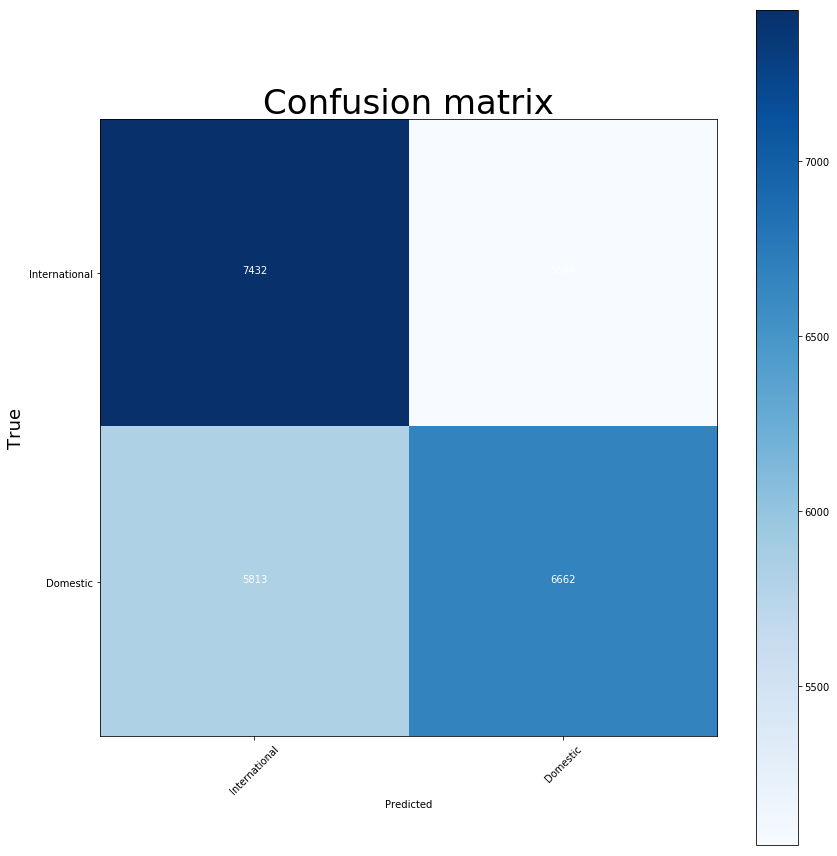

In [18]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(xtrain_norm, ytrain)
y_pred = knn.predict(xtest_norm)
y_score = knn.predict_proba(xtest_norm)[:,1]
fpr, tpr,_ = roc_curve(ytest, y_score)
roc_auc = auc(fpr, tpr)

print("Accuracy: %.3f"% metrics.accuracy_score(ytest, knn.predict(xtest_norm)))
print(metrics.classification_report(ytest, knn.predict(xtest_norm)))
plot_confusion_matrix(confusion_matrix(ytest,y_pred), ['International', 'Domestic'])
print('ROC AUC:', roc_auc)

Accuracy: 0.593
             precision    recall  f1-score   support

          0       0.58      0.65      0.62     12475
          1       0.61      0.53      0.57     12476

avg / total       0.59      0.59      0.59     24951

Confusion matrix
[[8134 4341]
 [5814 6662]]
ROC AUC: 0.631116423292


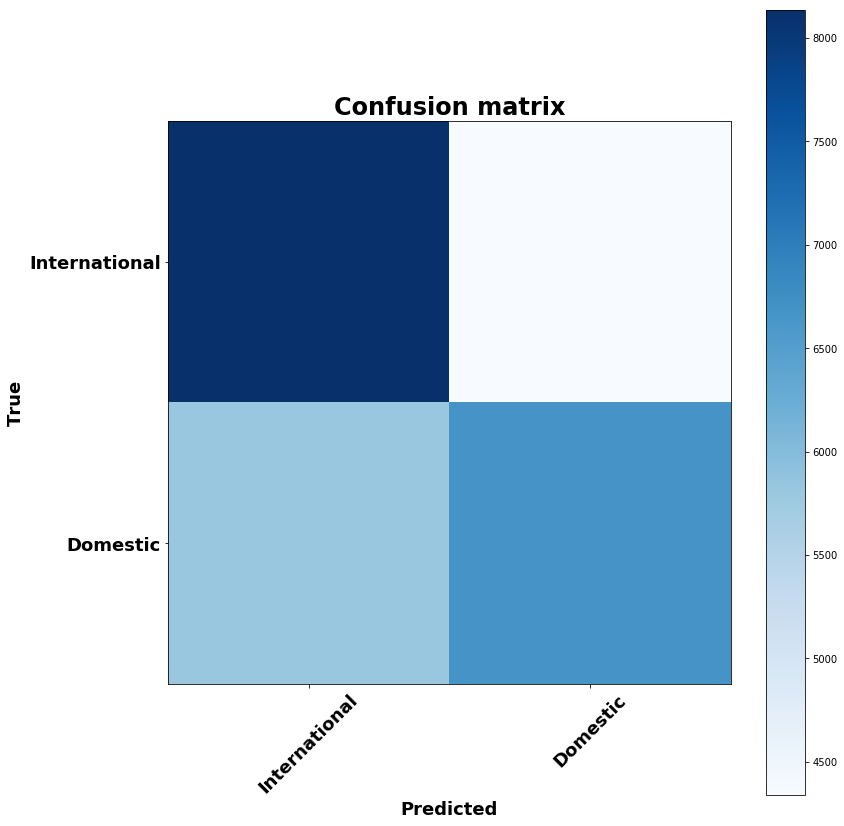

In [180]:
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(xtrain_norm, ytrain)
y_pred = knn5.predict(xtest_norm)
y_score = knn5.predict_proba(xtest_norm)[:,1]
fpr, tpr,_ = roc_curve(ytest, y_score)
roc_auc = auc(fpr, tpr)

print("Accuracy: %.3f"% metrics.accuracy_score(ytest, knn5.predict(xtest_norm)))
print(metrics.classification_report(ytest, knn5.predict(xtest_norm)))
plot_confusion_matrix(confusion_matrix(ytest,y_pred), ['International', 'Domestic'])
print('ROC AUC:', roc_auc)
plt.savefig('knn5_confusion_matrix',bbox_inches='tight')

## SVMs

### Linear

In [29]:
l_svm = SVC(kernel='linear')
l_svm.fit(xtrain_norm, ytrain_norm)
y_pred = l_svm.predict(xtest_norm)

print("Accuracy: %.3f"% metrics.accuracy_score(ytest_norm, l_svm.predict(xtest_norm)))
print(metrics.classification_report(ytest_norm, l_svm.predict(xtest_norm)))
print(metrics.confusion_matrix(ytest_norm,l_svm.predict(xtest_norm)))

Accuracy: 0.702


/Users/emilygeller/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          0       0.00      0.00      0.00      5307
          1       0.70      1.00      0.82     12475

avg / total       0.49      0.70      0.58     17782

[[    0  5307]
 [    0 12475]]


### RBF

In [ ]:
rbf_svm = SVC(kernel='rbf', gamma = 0.001)
rbf_svm.fit(xtrain_norm, ytrain_norm)
y_pred = svm.predict(xtest_norm)

print("Accuracy: %.3f"% metrics.accuracy_score(ytest_norm, rbf_svm.predict(xtest_norm)))
print(metrics.classification_report(ytest_norm, rbf_svm.predict(xtest_norm)))
print(metrics.confusion_matrix(ytest_norm,rbf_svm.predict(xtest_norm)))

## Logistic Regression

Accuracy: 0.520
             precision    recall  f1-score   support

          0       0.52      0.50      0.51     12476
          1       0.52      0.54      0.53     12475

avg / total       0.52      0.52      0.52     24951

Confusion matrix
[[6188 6288]
 [5678 6797]]
ROC AUC: 0.532438159422


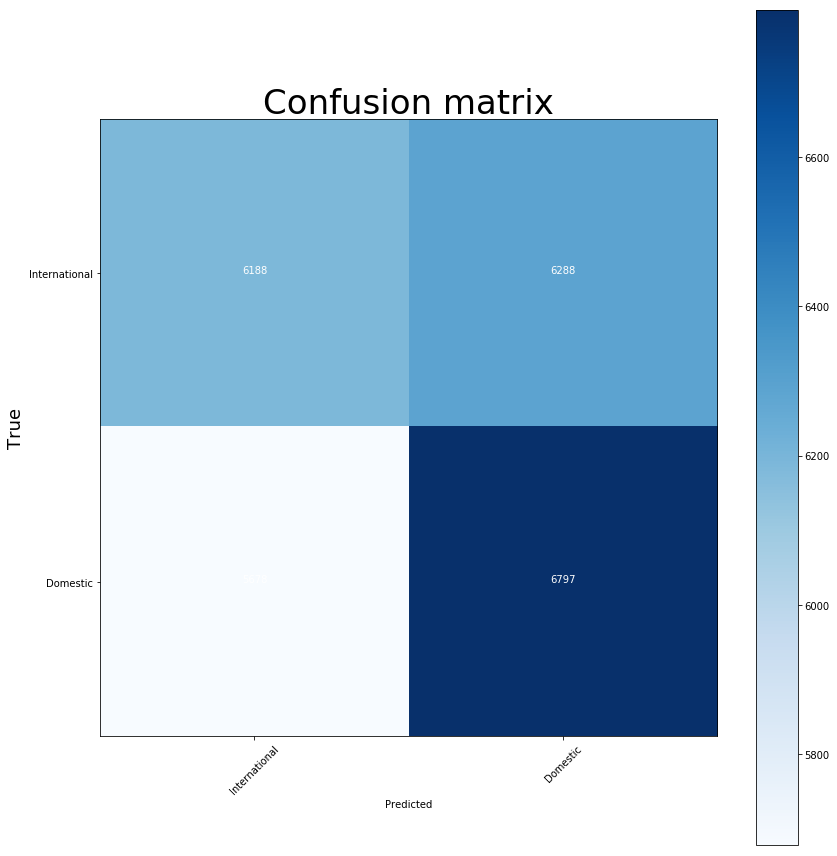

In [20]:
lr = LogisticRegression(class_weight = 'balanced')
lr.fit(xtrain, ytrain)
y_pred = lr.predict(xtest)
y_score = lr.predict_proba(xtest)[:,1]
fpr, tpr,_ = roc_curve(ytest, y_score)
roc_auc = auc(fpr, tpr)
    

print("Accuracy: %.3f"% metrics.accuracy_score(ytest, lr.predict(xtest)))
print(metrics.classification_report(ytest, lr.predict(xtest)))
plot_confusion_matrix(confusion_matrix(ytest,y_pred), ['International', 'Domestic'])
print('ROC AUC:', roc_auc)

100%|██████████| 7/7 [00:04<00:00,  1.70it/s]


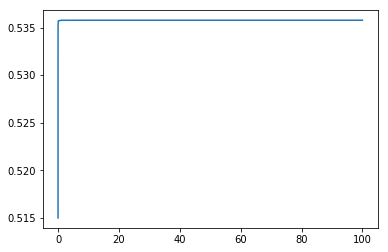

In [96]:
c_range = [0.00001,0.001, 0.01, 0.1, 1, 10,100]
c_auc = []

for c in tqdm(c_range):

    lr = LogisticRegression(class_weight = 'balanced', C = c)
    lr.fit(xtrain, ytrain)
    y_pred = lr.predict(xtest)
    y_score = lr.predict_proba(xtest)[:,1]
    fpr, tpr,_ = roc_curve(ytest, y_score)
    roc_auc = auc(fpr, tpr)
    c_auc.append(roc_auc)
    

plt.plot(c_range, c_auc)
plt.savefig('c_auc')

In [97]:
np.argmax(np.array(c_auc))

6

Accuracy: 0.520
             precision    recall  f1-score   support

          0       0.52      0.50      0.51     12476
          1       0.52      0.54      0.53     12475

avg / total       0.52      0.52      0.52     24951

Confusion matrix
[[6199 6277]
 [5689 6786]]
ROC AUC: 0.532461463485


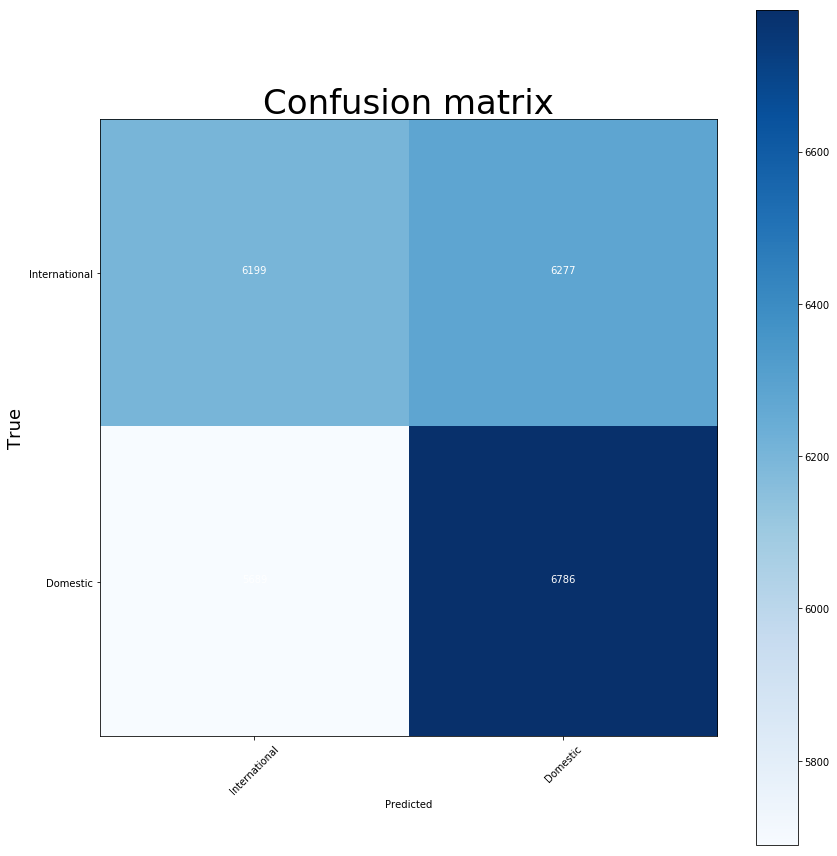

In [21]:
lr = LogisticRegression(class_weight = 'balanced', C = 100)
lr.fit(xtrain, ytrain)
y_pred = lr.predict(xtest)
y_score = lr.predict_proba(xtest)[:,1]
fpr, tpr,_ = roc_curve(ytest, y_score)
roc_auc = auc(fpr, tpr)
    

print("Accuracy: %.3f"% metrics.accuracy_score(ytest, lr.predict(xtest)))
print(metrics.classification_report(ytest, lr.predict(xtest)))
plot_confusion_matrix(confusion_matrix(ytest,y_pred), ['International', 'Domestic'])
print('ROC AUC:', roc_auc)

## Random Forests

Accuracy: 0.641
             precision    recall  f1-score   support

          0       0.64      0.65      0.65     12476
          1       0.64      0.63      0.64     12475

avg / total       0.64      0.64      0.64     24951

ROC AUC: 0.714183490418
Confusion matrix
[[8140 4336]
 [4610 7865]]


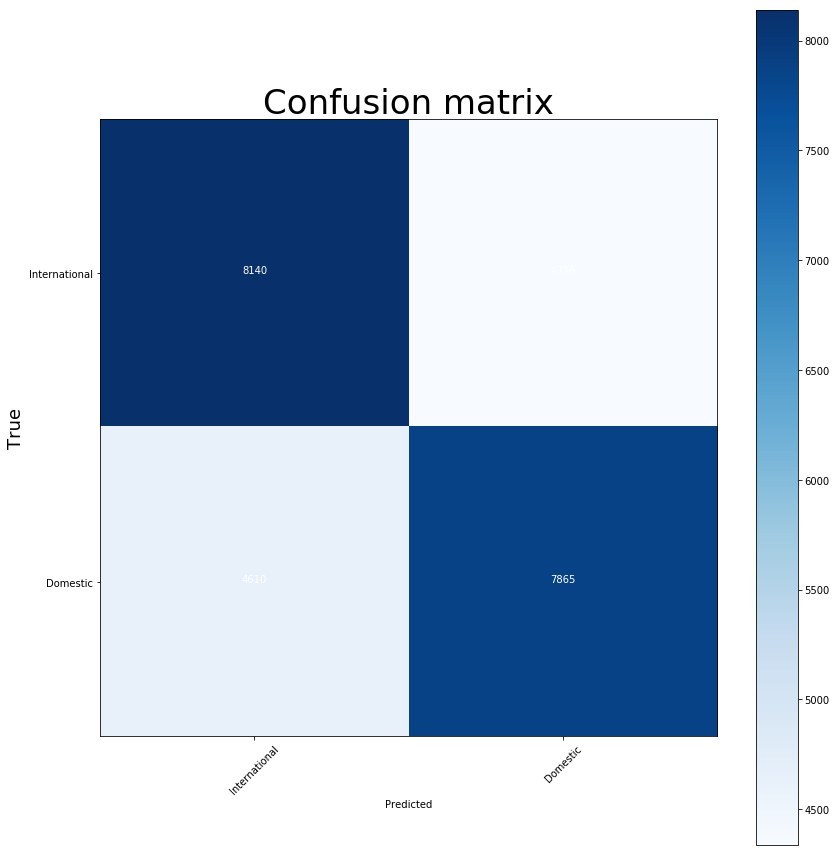

In [22]:
rf = RandomForestClassifier(max_depth = 20,n_estimators = 40)# class_weight = 'balanced')
rf.fit(xtrain, ytrain)
y_pred = rf.predict(xtest)
y_score = rf.predict_proba(xtest)[:,1]
fpr, tpr,_ = roc_curve(ytest, y_score)
roc_auc = auc(fpr, tpr)

print("Accuracy: %.3f"% metrics.accuracy_score(ytest, rf.predict(xtest)))
print(metrics.classification_report(ytest, rf.predict(xtest)))
print('ROC AUC:', roc_auc)
plot_confusion_matrix(confusion_matrix(ytest,y_pred), ['International', 'Domestic'])

In [38]:
from sklearn import grid_search

/Users/emilygeller/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [27]:
n_range = list(range(10,100))
n_up_auc = []
for n in tqdm(n_range):
    rf = RandomForestClassifier(n_estimators = n)#class_weight = 'balanced')
    rf.fit(xtrain, ytrain)
    y_score = rf.predict_proba(xtest)[:,1]
    fpr, tpr,_ = roc_curve(ytest, y_score)
    roc_auc = auc(fpr, tpr)
    n_up_auc.append(roc_auc)
print(n_up_auc)

100%|██████████| 90/90 [08:18<00:00,  5.54s/it]

[0.76317588366858757, 0.76549208066662344, 0.76640188360048089, 0.76592897240457192, 0.76724750237891626, 0.7684333045700249, 0.76673576714185021, 0.76887143957681314, 0.77042994292528633, 0.77221053199698519, 0.77210590465959161, 0.77055101867730336, 0.77112402104626043, 0.77248027635906635, 0.77098366338319479, 0.77281140993111574, 0.77161909262577733, 0.77263717560160394, 0.77185789662042903, 0.77299572855232745, 0.77285503999342064, 0.77251774469104939, 0.77443493591864709, 0.77470251821372782, 0.77474616755151859, 0.77383926557828708, 0.77476767899376831, 0.77434842753798716, 0.77448936025304849, 0.77434691441234516, 0.7749943747707021, 0.7745217912580532, 0.77336502437385202, 0.77462965366449477, 0.77477846684070295, 0.77431713057406903, 0.77618918503888201, 0.77524663947966455, 0.77538532981320119, 0.77520003777995239, 0.77440574962043363, 0.77598961629575292, 0.77520291625251136, 0.77498464065032935, 0.77546211049865044, 0.77593479681389066, 0.77594155287169408, 0.7754854049233

In [42]:
parameters = {'n_estimators': tuple(range(10,100)), 'max_depth': tuple(range(5,40))}
rf_gs = RandomForestClassifier()
clf = grid_search.GridSearchCV(rf_gs,parameters, scoring = 'roc_auc')
clf.fit(xtrain,ytrain)
clf.best_params_

KeyboardInterrupt: 

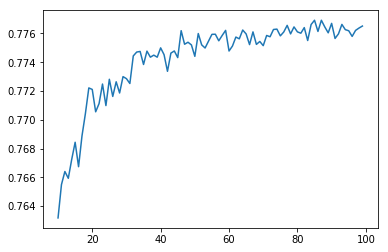

In [28]:
plt.plot(n_range, n_up_auc)
plt.savefig('n_up_auc')

In [29]:
np.argmax(np.array(n_up_auc))

75

Accuracy: 0.675
             precision    recall  f1-score   support

          0       0.66      0.71      0.69     12475
          1       0.69      0.64      0.66     12476

avg / total       0.68      0.67      0.67     24951

ROC AUC: 0.758088128807
Confusion matrix
[[8856 3619]
 [4492 7984]]


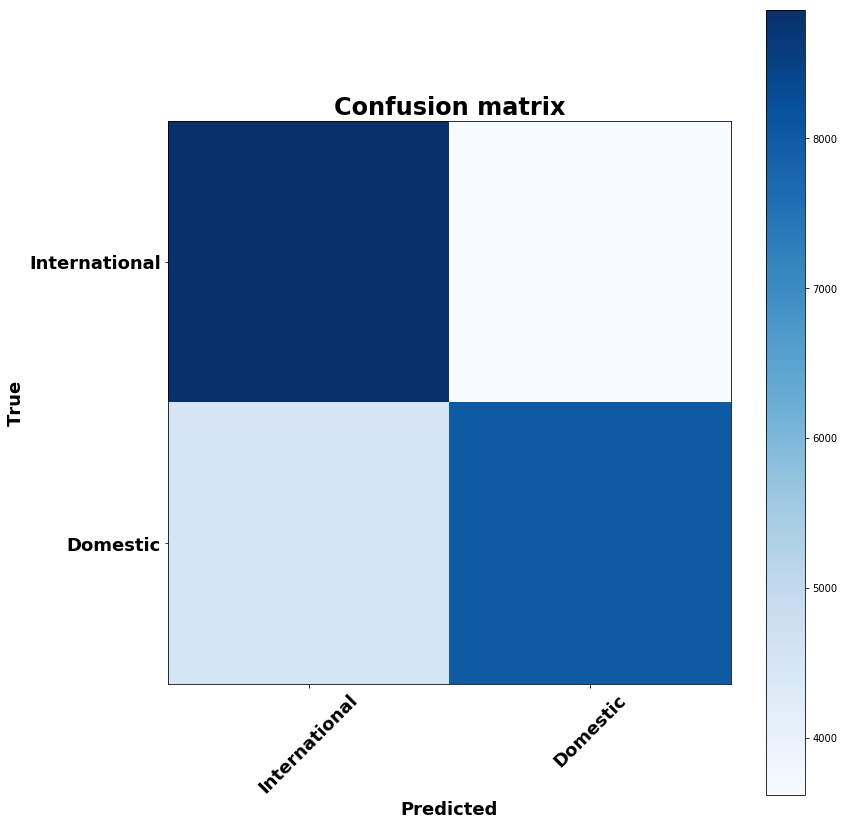

In [181]:
rf_64 = RandomForestClassifier(max_depth = 25,n_estimators = 75,class_weight = 'balanced', random_state = 123)
rf_64.fit(xtrain, ytrain)
y_pred = rf_64.predict(xtest)
y_score = rf_64.predict_proba(xtest)[:,1]
fpr, tpr,_ = roc_curve(ytest, y_score)
roc_auc = auc(fpr, tpr)

print("Accuracy: %.3f"% metrics.accuracy_score(ytest, rf_64.predict(xtest)))
print(metrics.classification_report(ytest, rf_64.predict(xtest)))
print('ROC AUC:', roc_auc)
plot_confusion_matrix(confusion_matrix(ytest,y_pred), ['International', 'Domestic'])
plt.savefig('rf_75_confusion_matrix',bbox_inches='tight')

In [65]:
features = pd.DataFrame()
features['importances'] = rf_64.feature_importances_
features['features'] = xtrain.columns
features.sort_values('importances',ascending = False)

,importances,features
10,0.274760,diff_account_to_first_booking
11,0.215755,age
12,0.177020,total_sessions
13,0.089911,total_sessions_on_mac
14,0.075242,total_sessions_on_windows
15,0.049988,total_sessions_on_iphone
3,0.024871,signup_method_facebook
0,0.019171,gender_FEMALE
1,0.019066,gender_MALE
16,0.013645,total_sessions_on_android


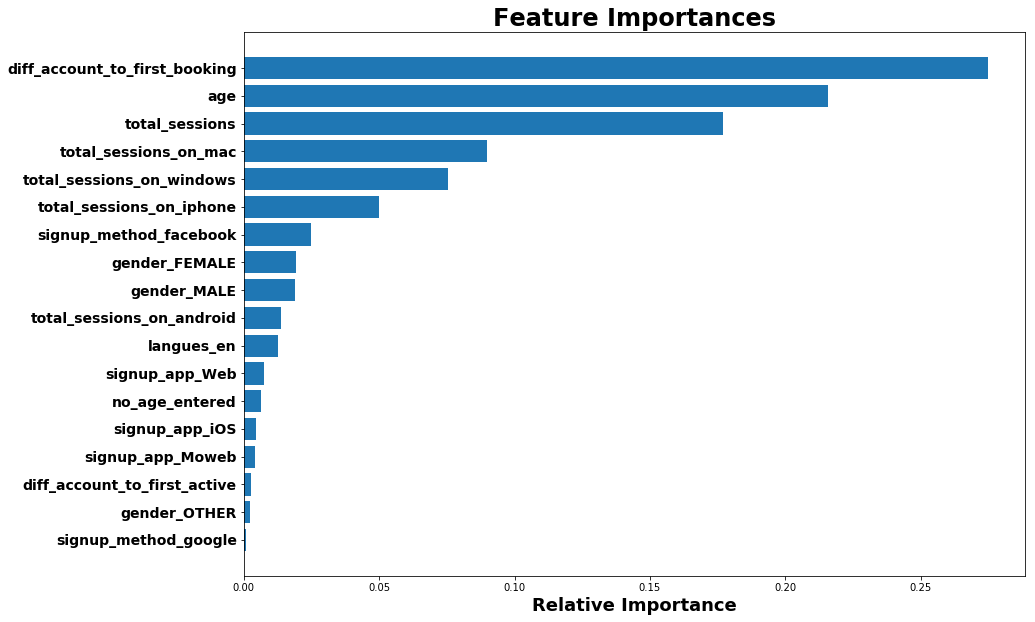

''

In [73]:
features2 = features['features']
importances = rf_64.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize = (14,10))
plt.title('Feature Importances', fontweight = 'bold', fontsize = 24)
plt.barh(range(len(indices)), importances[indices],  align='center')
plt.yticks(range(len(indices)), features2[indices], fontsize = 14, fontweight = 'bold')
plt.xlabel('Relative Importance',fontweight = 'bold', fontsize = 18)
plt.savefig('FeatureImportances', bbox_inches = 'tight')
plt.show()
;

In [52]:
rf_64.estimators_

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=25,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=843828734, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=25,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=914636141, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=25,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fra

In [102]:
rf_5 = RandomForestClassifier(max_depth = 6,n_estimators = 1,class_weight = 'balanced', random_state = 123)
rf_5.fit(xtrain, ytrain)
y_pred = rf_5.predict(xtest)
y_score = rf_5.predict_proba(xtest)[:,1]
fpr, tpr,_ = roc_curve(ytest, y_score)
roc_auc = auc(fpr, tpr)

print("Accuracy: %.3f"% metrics.accuracy_score(ytest, rf_5.predict(xtest)))
print(metrics.classification_report(ytest, rf_5.predict(xtest)))
print('ROC AUC:', roc_auc)


Accuracy: 0.542
             precision    recall  f1-score   support

          0       0.55      0.48      0.51     12476
          1       0.54      0.60      0.57     12475

avg / total       0.54      0.54      0.54     24951

ROC AUC: 0.550601713205


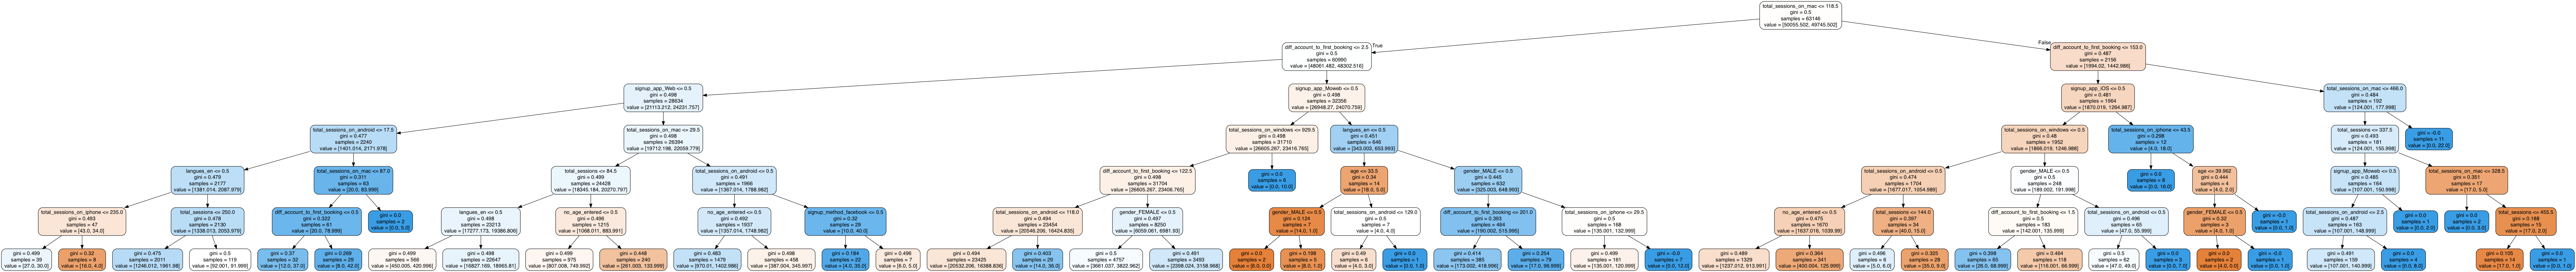

In [103]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus 
features = list(xtrain.columns)
dot_data = StringIO()  
export_graphviz(rf_5.estimators_[0], out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

## XGBoost

In [28]:
params = {"objective": "multi:softmax", "num_class": 30}

T_train_xgb = xgb.DMatrix(xtrain, ytrain)
X_test_xgb  = xgb.DMatrix(xtest)

gbm = xgb.train(params, T_train_xgb, 40)
y_pred = gbm.predict(X_test_xgb)

print("Accuracy: %.3f"% metrics.accuracy_score(ytest, y_pred))
print(metrics.classification_report(ytest, y_pred))
print(metrics.confusion_matrix(ytest,y_pred))

Accuracy: 0.565
             precision    recall  f1-score   support

          0       0.57      0.53      0.55     12476
          1       0.56      0.59      0.58     12475

avg / total       0.56      0.56      0.56     24951

[[6674 5802]
 [5060 7415]]


## Naive Bayes

### Gaussian

Accuracy: 0.513
             precision    recall  f1-score   support

          0       0.51      0.92      0.65     12476
          1       0.57      0.10      0.18     12475

avg / total       0.54      0.51      0.42     24951

ROC AUC: 0.528878992355
Confusion matrix
[[11504   972]
 [11177  1298]]


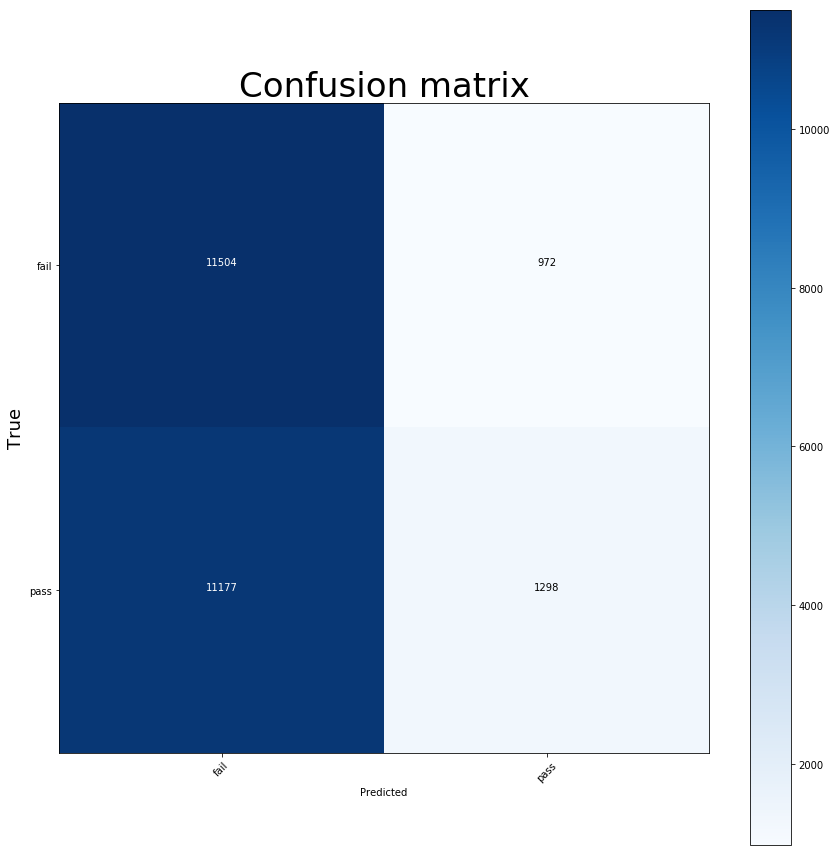

In [24]:
nb_g = naive_bayes.GaussianNB()
nb_g.fit(xtrain, ytrain)
y_pred = nb_g.predict(xtest)
y_score = nb_g.predict_proba(xtest)[:,1]
fpr, tpr,_ = roc_curve(ytest, y_score)
roc_auc = auc(fpr, tpr)

print("Accuracy: %.3f"% metrics.accuracy_score(ytest,y_pred ))
print(metrics.classification_report(ytest, nb_g.predict(xtest)))
print('ROC AUC:', roc_auc)
plot_confusion_matrix(confusion_matrix(ytest,y_pred), ['fail', 'pass'])

### Bernoulli

Accuracy: 0.527
             precision    recall  f1-score   support

          0       0.52      0.70      0.60     12476
          1       0.54      0.36      0.43     12475

avg / total       0.53      0.53      0.51     24951

ROC AUC: 0.544844254074
Confusion matrix
[[8680 3796]
 [8002 4473]]


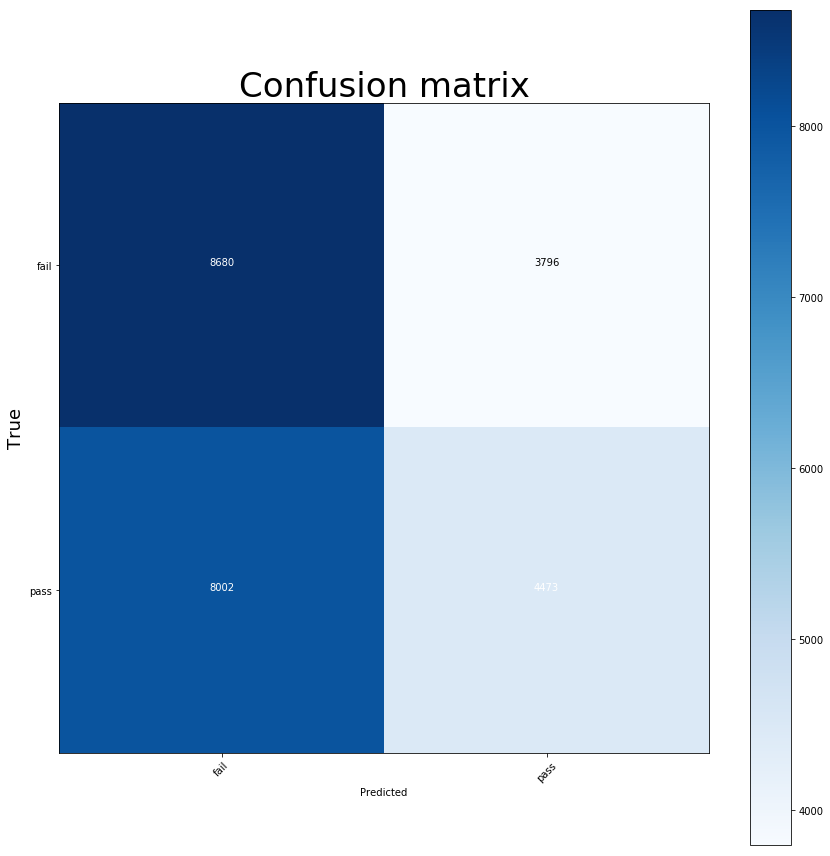

In [25]:
nb_b = naive_bayes.BernoulliNB()
nb_b.fit(xtrain, ytrain)
y_pred = nb_b.predict(xtest)
y_score = nb_b.predict_proba(xtest)[:,1]
fpr, tpr,_ = roc_curve(ytest, y_score)
roc_auc = auc(fpr, tpr)

print("Accuracy: %.3f"% metrics.accuracy_score(ytest, y_pred))
print(metrics.classification_report(ytest, nb_b.predict(xtest)))
print('ROC AUC:', roc_auc)
plot_confusion_matrix(confusion_matrix(ytest,y_pred), ['fail', 'pass'])

## Roc Curves

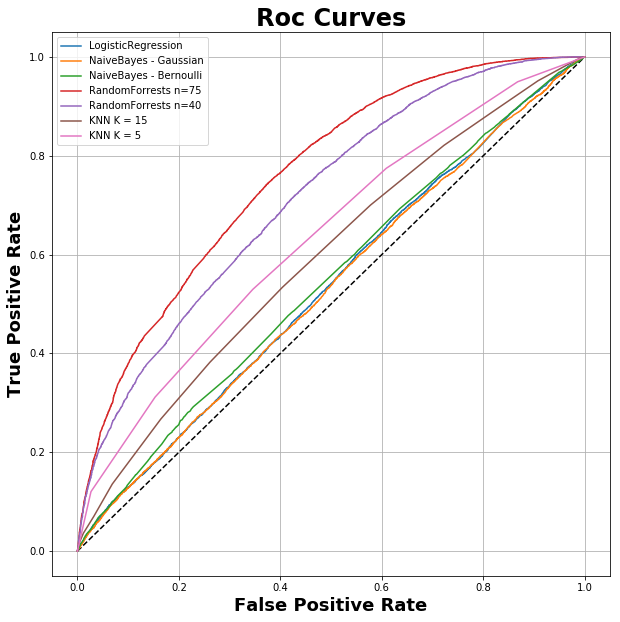

In [153]:
# What about ROC ? 




lr_score=lr.predict_proba(xtest)[:,1]
nb_g_score = nb_g.predict_proba(xtest)[:,1]
nb_b_score = nb_b.predict_proba(xtest)[:,1]
rf_64_score = rf_64.predict_proba(xtest)[:,1]
rf_score = rf.predict_proba(xtest)[:,1]
knn_score = knn.predict_proba(xtest_norm)[:,1]
knn5_score = knn5.predict_proba(xtest_norm)[:,1]
#l_svm_score = l_svm.predict_proba(xtest)[:,1]

lr_fpr, lr_tpr,_ = roc_curve(ytest, lr_score)
nb_g_fpr, nb_g_tpr,_ = roc_curve(ytest, nb_g_score)
nb_b_fpr, nb_b_tpr,_ = roc_curve(ytest, nb_b_score)
rf_64_fpr, rf_64_tpr,_ = roc_curve(ytest, rf_64_score)
rf_fpr, rf_tpr,_ = roc_curve(ytest, rf_score)
knn_fpr, knn_tpr,_ = roc_curve(ytest, knn_score)
knn5_fpr, knn5_tpr,_ = roc_curve(ytest, knn5_score)
#l_svm_fpr, l_svm_tpr,_ = roc_curve(ytest, l_svm_score)
#roc_auc = auc(fpr, tpr)

plt.figure(figsize = (10,10))
plt.subplot(1,1,1)
# Plotting our Baseline..
plt.plot([0,1],[0,1], 'k--')

plt.plot(lr_fpr,lr_tpr, label = 'LogisticRegression')
plt.plot(nb_g_fpr,nb_g_tpr, label = 'NaiveBayes - Gaussian')
plt.plot(nb_b_fpr,nb_b_tpr, label = 'NaiveBayes - Bernoulli')
plt.plot(rf_64_fpr,rf_64_tpr, label = 'RandomForrests n=75')
plt.plot(rf_fpr,rf_tpr, label = 'RandomForrests n=40')
plt.plot(knn_fpr,knn_tpr, label = 'KNN K = 15')
plt.plot(knn5_fpr,knn5_tpr, label = 'KNN K = 5')
#plt.plot(l_svm_fpr,l_svm_tpr, label = 'SVM-Linear')

plt.legend()
plt.grid(True)
plt.xlabel('False Positive Rate', fontweight = 'bold', fontsize = '18')
plt.ylabel('True Positive Rate', fontweight = 'bold', fontsize = '18')
plt.title('Roc Curves', fontweight = 'bold', fontsize = '24')

plt.savefig('RocCurve')

## Final Model

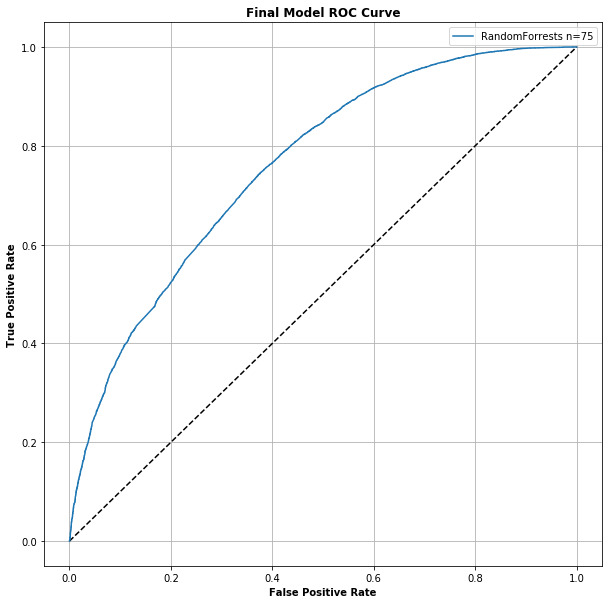

In [31]:
rf_64_score = rf_64.predict_proba(xtest)[:,1]
rf_64_fpr, rf_64_tpr,_ = roc_curve(ytest, rf_64_score)
plt.figure(figsize = (10,10))
plt.subplot(1,1,1)
# Plotting our Baseline..
plt.plot([0,1],[0,1], 'k--')
plt.plot(rf_64_fpr,rf_64_tpr, label = 'RandomForrests n=75')
plt.legend()
plt.grid(True)
plt.xlabel('False Positive Rate', fontweight = 'bold')
plt.ylabel('True Positive Rate', fontweight = 'bold')
plt.title('Final Model ROC Curve', fontweight = 'bold')

plt.savefig('FinalRFRocCurve')

### Prep for use in app

In [104]:
model = RandomForestClassifier(max_depth = 6,n_estimators = 75,class_weight = 'balanced', random_state = 123)
model.fit(xtrain, ytrain)


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=6, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=75, n_jobs=1, oob_score=False, random_state=123,
            verbose=0, warm_start=False)

In [23]:
airbnb_dict = ('airbnb_model': model, 'airbnb_features': list(xtrain.columns),

['gender_FEMALE',
 'gender_MALE',
 'gender_OTHER',
 'signup_method_facebook',
 'signup_method_google',
 'signup_app_Moweb',
 'signup_app_Web',
 'signup_app_iOS',
 'langues_en',
 'diff_account_to_first_active',
 'diff_account_to_first_booking',
 'age',
 'total_sessions',
 'total_sessions_on_mac',
 'total_sessions_on_windows',
 'total_sessions_on_iphone',
 'total_sessions_on_android',
 'no_age_entered']

In [105]:
pickle.dump(model, open("airbnb_firstdestinations_model.p", "wb"))

In [106]:
#model = pickle.load( open( "airbnb_firstdestinations_model.p", "rb" ), encoding='latin1' )

def airbnb_firstdestination(gender, 
                            signup_method, 
                            signup_app, 
                            langues_en, 
                            diff_account_to_first_active, 
                            diff_account_to_first_booking, 
                            age, 
                            total_sessions_on_mac, 
                            total_sessions_on_windows, 
                            total_sessions_on_iphone, 
                            total_sessions_on_android):
    # categorical features:
    gender_inputs = {'male': [0,1,0], 'female': [1,0,0], 'other': [0,0,1], 'unknown': [0,0,0]}
    signup_method_inputs = {'facebook': [1,0], 'google': [0,1], 'direct': [0,0]}
    signup_app_inputs = {'moweb': [1,0,0], 'web': [0,1,0], 'ios':[0,0,1], 'android':[0,0,0]}
    language_en_inputs = {'true': [1], 'false': [0]}
    
    # numerical features
    total_sessions_on_mac = int(total_sessions_on_mac)
    total_sessions_on_windows = int(total_sessions_on_windows)
    total_sessions_on_iphone = int(total_sessions_on_iphone)
    total_sessions_on_android = int(total_sessions_on_android)
    diff_account_to_first_active = int(diff_account_to_first_active)
    diff_account_to_first_booking = int(diff_account_to_first_booking)
    
    total_sessions_input = total_sessions_on_mac + total_sessions_on_windows + total_sessions_on_iphone + total_sessions_on_android
    if age == '':
        no_age_entered = 1
        age = 37 # mean age
    else:
        no_age_entered = 0
        age = int(age)

        
    inputs = []
    inputs.extend(gender_inputs[gender])
    inputs.extend(signup_method_inputs[signup_method])
    inputs.extend(signup_app_inputs[signup_app])
    inputs.extend(language_en_inputs[langues_en])
    inputs.append(diff_account_to_first_active)
    inputs.append(diff_account_to_first_booking)
    inputs.append(age)
    inputs.append(total_sessions_input)
    inputs.append(total_sessions_on_mac)
    inputs.append(total_sessions_on_windows)
    inputs.append(total_sessions_on_iphone)
    inputs.append(total_sessions_on_android)
    inputs.append(no_age_entered)
    
    return model.predict_proba([inputs]), model.predict([inputs])

In [150]:
airbnb_firstdestination('male', 
                            'google', 
                            'web', 
                            'true', #language
                            0, # diff_account_to_first_active,
                            2, # diff_account_to_first_booking,
                            18, # age, 
                            0, # mac
                            0, # windows
                            20, # iphone
                            0) # android

(array([[ 0.48651398,  0.51348602]]), array([1], dtype=uint8))

In [86]:
model.classes_

array([0, 1], dtype=uint8)

In [37]:
inputs = []
gender_inputs = {'male': [0,1,0], 'female': [1,0,0], 'other': [0,0,1], 'unknown': [0,0,0]}
inputs.extend(gender_inputs['male'])
inputs

[0, 1, 0]

In [79]:
age = '23'
int(age)

23

In [28]:
model.predict_proba(xtest)

array([[ 0.68      ,  0.32      ],
       [ 0.20341135,  0.79658865],
       [ 0.25904768,  0.74095232],
       ..., 
       [ 0.50582563,  0.49417437],
       [ 0.36735639,  0.63264361],
       [ 0.68055377,  0.31944623]])

In [82]:
users.age.describe()

count    88908.000000
mean        36.924928
std         12.272861
min          0.000000
25%         30.000000
50%         36.924928
75%         38.000000
max        115.000000
Name: age, dtype: float64